In [48]:
import matplotlib.pyplot as plt 
from scipy.stats import gamma, beta, t
import pandas as pd
import seaborn as sns
from scipy import stats
import numpy as np

In [49]:
num_values = 500
import random
my_randoms = [round(random.uniform(1, 8),2) for x in range(num_values)]

## Table with two columns (Speed and Age) which are inversely correlated

### add random values to both columns

In [50]:

actual_age = beta.rvs(2, 2 ,loc=30, scale=30, size=num_values)
actual_age = np.add(actual_age, my_randoms)

actual_speed = gamma.rvs(a = 10, loc=10, scale=5, size=num_values)
actual_speed = np.add(actual_speed, my_randoms)

          
correlation_dict = {'speed': sorted(actual_speed),
                      'age': np.sort(actual_age)[::-1] } 

df = pd.DataFrame.from_dict(correlation_dict) 

In [51]:
df.head(10)

,speed,age
0,30.993669,64.818401
1,32.027796,64.807310
2,32.125905,64.639333
3,33.341027,64.264195
4,34.303773,64.069168
5,35.924704,63.473453
6,37.158550,63.396562
7,37.199610,63.372046
8,38.223027,63.312343
9,38.262386,62.942142


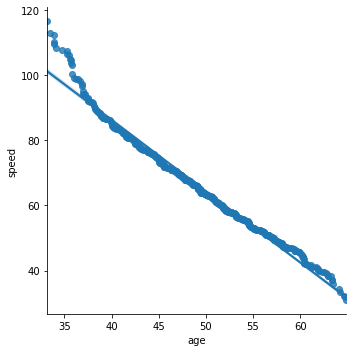

In [52]:
sns.lmplot(x ='age', y ='speed', data = df)

# Density Estimation

## Fitting a Beta Distribution to the Age column

In [55]:
age_a, age_b, age_loc, age_scale = beta.fit(df.age)
print('beta parameters', age_a, age_b, age_loc, age_scale)

beta parameters 2.309333513653634 2.1627018555673225 32.05309858404949 33.676817178442235


## Generate new synthetic Age column from this beta


In [56]:
synthetic_age_beta = beta.rvs(age_a, age_b ,loc=age_loc,scale=age_scale,size=len(df.age))

## Difference between actual vs synthetic Age column

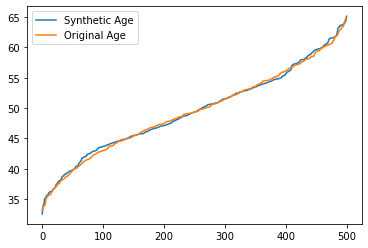

In [57]:
plt.plot(sorted(synthetic_age_beta), label='Synthetic Age')
plt.plot(sorted(df.age), label='Original Age')
plt.legend()
plt.show()

## Fit gamma to original speed column


In [58]:
speed_a, speed_loc, speed_scale = gamma.fit(df.speed)

# 2. Covariance and Correlation

Covariance = measure if elements from two arrays move in the same direction

correlation = normalized covariance (always between -1 and 1)

## Off-diagonal entries are almost -1 because columns are inversely correlated

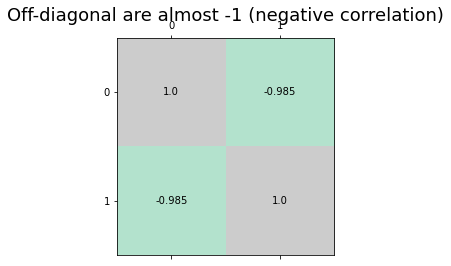

In [37]:
fig, ax = plt.subplots()

ax.matshow(df.corr().values, cmap=plt.cm.Pastel2)
ax.set_title('Off-diagonal are almost -1 (negative correlation)', fontsize=18)

for i in range(2):
    for j in range(2):
        c = round(df.corr().values[j,i], 3)
        ax.text(i, j, str(c), va='center', ha='center')

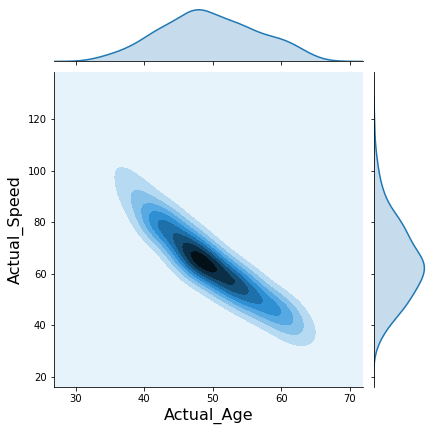

In [38]:
h = sns.jointplot(df.age, df.speed, kind='kde', stat_func=None);
h.set_axis_labels('Actual_Age', 'Actual_Speed',  fontsize=16);

## Create a Gaussian Copula using the Correlation matrix of above table (df.corr)

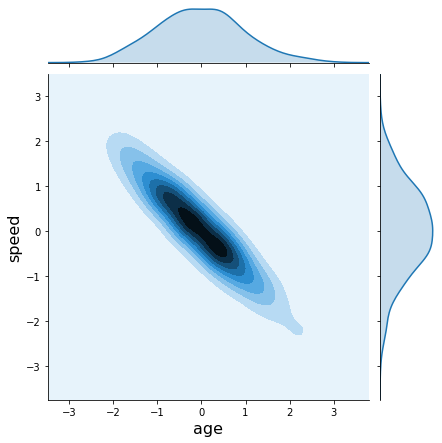

In [40]:
mvnorm = stats.multivariate_normal(mean=[0, 0], cov=df.corr().values)
x = mvnorm.rvs(500)

h = sns.jointplot(x[:, 0], x[:, 1], kind='kde', stat_func=None);
h.set_axis_labels('age', 'speed', fontsize=16);

## Modify the Copula to have the original Age and Speed distributions

ppf = inverse of CDF

In [41]:
norm = stats.norm()
x_unif = norm.cdf(x)

age_distribution = stats.beta(a=age_a, b=age_b, loc=age_loc, scale=age_scale)  # Age column

speed_distribution = stats.gamma(a=speed_a, loc=speed_loc,scale=speed_scale)

age_ppf = age_distribution.ppf(x_unif[:, 0])

speed_ppf = speed_distribution.ppf(x_unif[:, 1])

## Create Synthetic Table which has same correlation and same column distributions

In [42]:
synthetic_df = pd.DataFrame({ 'speed' : speed_ppf, 'age' : age_ppf})
synthetic_df = synthetic_df.sort_values('speed')

## How the synthetic data looks 

In [43]:
synthetic_df.head(10)

,speed,age
449,30.418158,65.196428
374,32.148628,64.791446
98,33.867711,63.668611
364,35.035533,62.417123
186,35.169337,63.810553
489,35.247056,62.791949
171,35.704364,63.586950
286,35.711455,64.126327
95,36.124321,63.338060
254,36.147298,63.071822


## The correlation matrix is almost same as the original covariance above
## Off-diagonal entries are again almost -1

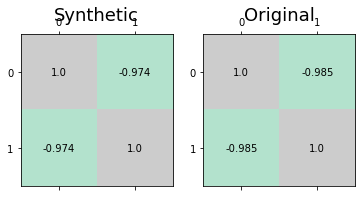

In [45]:

fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.matshow(synthetic_df.corr().values, cmap=plt.cm.Pastel2)
ax1.set_title('Synthetic', fontsize=18)

for i in range(2):
    for j in range(2):
        c = round(synthetic_df.corr().values[j,i], 3)
        ax1.text(i, j, str(c), va='center', ha='center')
        
ax2.matshow(df.corr().values, cmap=plt.cm.Pastel2)
ax2.set_title('Original', fontsize=18)

for i in range(2):
    for j in range(2):
        c = round(df.corr().values[j,i], 3)
        ax2.text(i, j, str(c), va='center', ha='center')

Text(0.5, 0.98, 'Original')

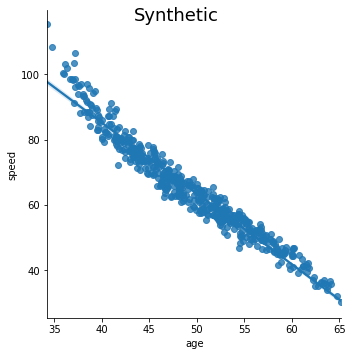

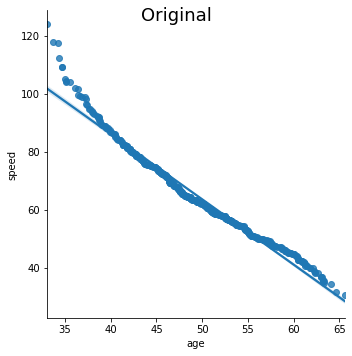

In [46]:
lm=sns.lmplot(x ='age', y ='speed', data = synthetic_df)
fig = lm.fig 
fig.suptitle("Synthetic", fontsize=18)

lm=sns.lmplot(x ='age', y ='speed', data = df)
fig = lm.fig 
fig.suptitle("Original", fontsize=18)

## The original and synthetic data have same dependence 

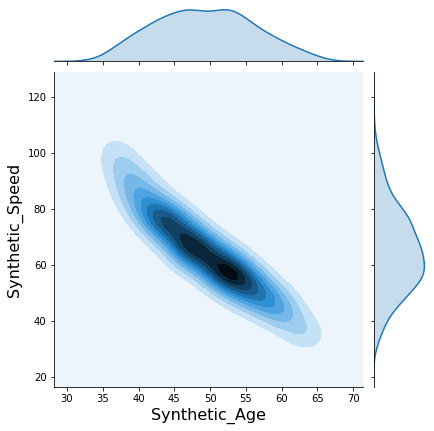

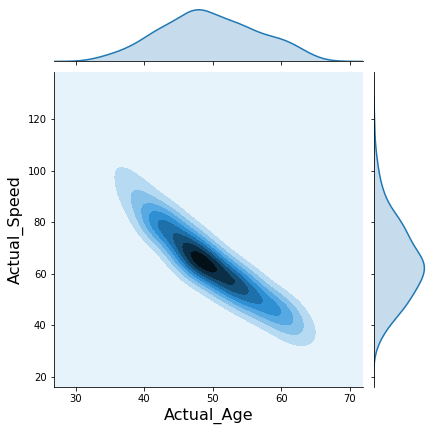

In [47]:

h = sns.jointplot(synthetic_df.age, synthetic_df.speed, kind='kde', stat_func=None);
h.set_axis_labels('Synthetic_Age', 'Synthetic_Speed',  fontsize=16);

h = sns.jointplot(df.age, df.speed, kind='kde', stat_func=None);
h.set_axis_labels('Actual_Age', 'Actual_Speed',  fontsize=16);